## 1-Libraries

In [64]:
from sklearn.experimental import enable_iterative_imputer
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

## 2-Data Loading

In [35]:
basedir = r"C:/Pro/Cours/A5 - IPP/DataCamp/Individual_Ramp_Challenge/Datacamp-Challenge-Volcanic-events-prediction-from-tephras/data/"

train = pd.read_csv(basedir + "train.csv")
test = pd.read_csv(basedir + "test.csv")

In [36]:
train.head(3)

,Volcano,Event,Magnitude,VEI,SampleID,SampleObservationID,IGSN,Location,Latitude,Longitude,...,La_Yb,Zr_Nb,Sr87_Sr86,Sr87_Sr86_2SE,Nd143_Nd144,Nd143_Nd144_2SE,MeasurementRun,Comments,Flag,FlagDescription
0,Puyehue-Cordón Caulle,PCC2011,5.0,NaN,PCC-1,13-19-1-01,NaN,"Bariloche (BSI), km 7.600",-41.13,-71.401777,...,5.576923,38.125000,NaN,NaN,NaN,NaN,AllowayMay2014,NaN,NaN,NaN
1,Puyehue-Cordón Caulle,PCC2011,5.0,NaN,PCC-1,13-19-1-02,NaN,"Bariloche (BSI), km 7.600",-41.13,-71.401777,...,4.892183,34.274194,NaN,NaN,NaN,NaN,AllowayMay2014,NaN,NaN,NaN
2,Puyehue-Cordón Caulle,PCC2011,5.0,NaN,PCC-1,13-19-1-03,NaN,"Bariloche (BSI), km 7.600",-41.13,-71.401777,...,4.353741,41.363636,NaN,NaN,NaN,NaN,AllowayMay2014,NaN,NaN,NaN


In [37]:
test.head(3)

,Volcano,Event,Magnitude,VEI,SampleID,SampleObservationID,IGSN,Location,Latitude,Longitude,...,La_Yb,Zr_Nb,Sr87_Sr86,Sr87_Sr86_2SE,Nd143_Nd144,Nd143_Nd144_2SE,MeasurementRun,Comments,Flag,FlagDescription
0,Puyehue-Cordón Caulle,PCC2011,5.0,NaN,PCC-10 (2),PCC-10 (2),NaN,Villa Traful,-40.595329,-71.384650,...,5.152778,32.974773,NaN,NaN,NaN,NaN,AllowaySOLICPMS2015,NaN,SampleID_Issue,A specific SampleID is not provided in the pub...
1,Puyehue-Cordón Caulle,PCC2011,5.0,NaN,PCC-19 (2),PCC-19 (2),NaN,"National Route 40, Villa Llanquin",-40.880955,-71.016003,...,5.313993,34.827795,NaN,NaN,NaN,NaN,AllowaySOLICPMS2015,NaN,SampleID_Issue,A specific SampleID is not provided in the pub...
2,Puyehue-Cordón Caulle,PCC2011,5.0,NaN,PCC-20,PCC-20_10,NaN,"National Route 40, Confluencia",-40.670264,-71.062683,...,NaN,NaN,NaN,NaN,NaN,NaN,"25th August, 2013",NaN,Geochemistry_Issue,The data is published normalized in the origin...


## 3-Data Exploration and Cleaning

In [38]:
majors = ['SiO2_normalized', 'TiO2_normalized', 'Al2O3_normalized',
          'FeOT_normalized',
          # 'FeO_normalized', 'Fe2O3_normalized', 'Fe2O3T_normalized',
          'MnO_normalized', 'MgO_normalized', 'CaO_normalized',
          'Na2O_normalized', 'K2O_normalized',
          # 'P2O5_normalized','Cl_normalized'
          ]
traces = ['Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Cs', 'Ba', 'La',
          'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
          'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Pb',
          'Th', 'U']

#### 3.1-Colunm removal

In [39]:
def get_major_traces(data, 
                     majors=majors, 
                     traces=traces):
    data_majors = train.loc[:, majors]
    data_traces = train.loc[:, traces]
    label = train.loc[:, 'Event']
    new_data = pd.concat([data_majors, data_traces, label], axis=1)
    return new_data

train = get_major_traces(train)
test = get_major_traces(test)

#### 3.2-Missing values

<Axes: >

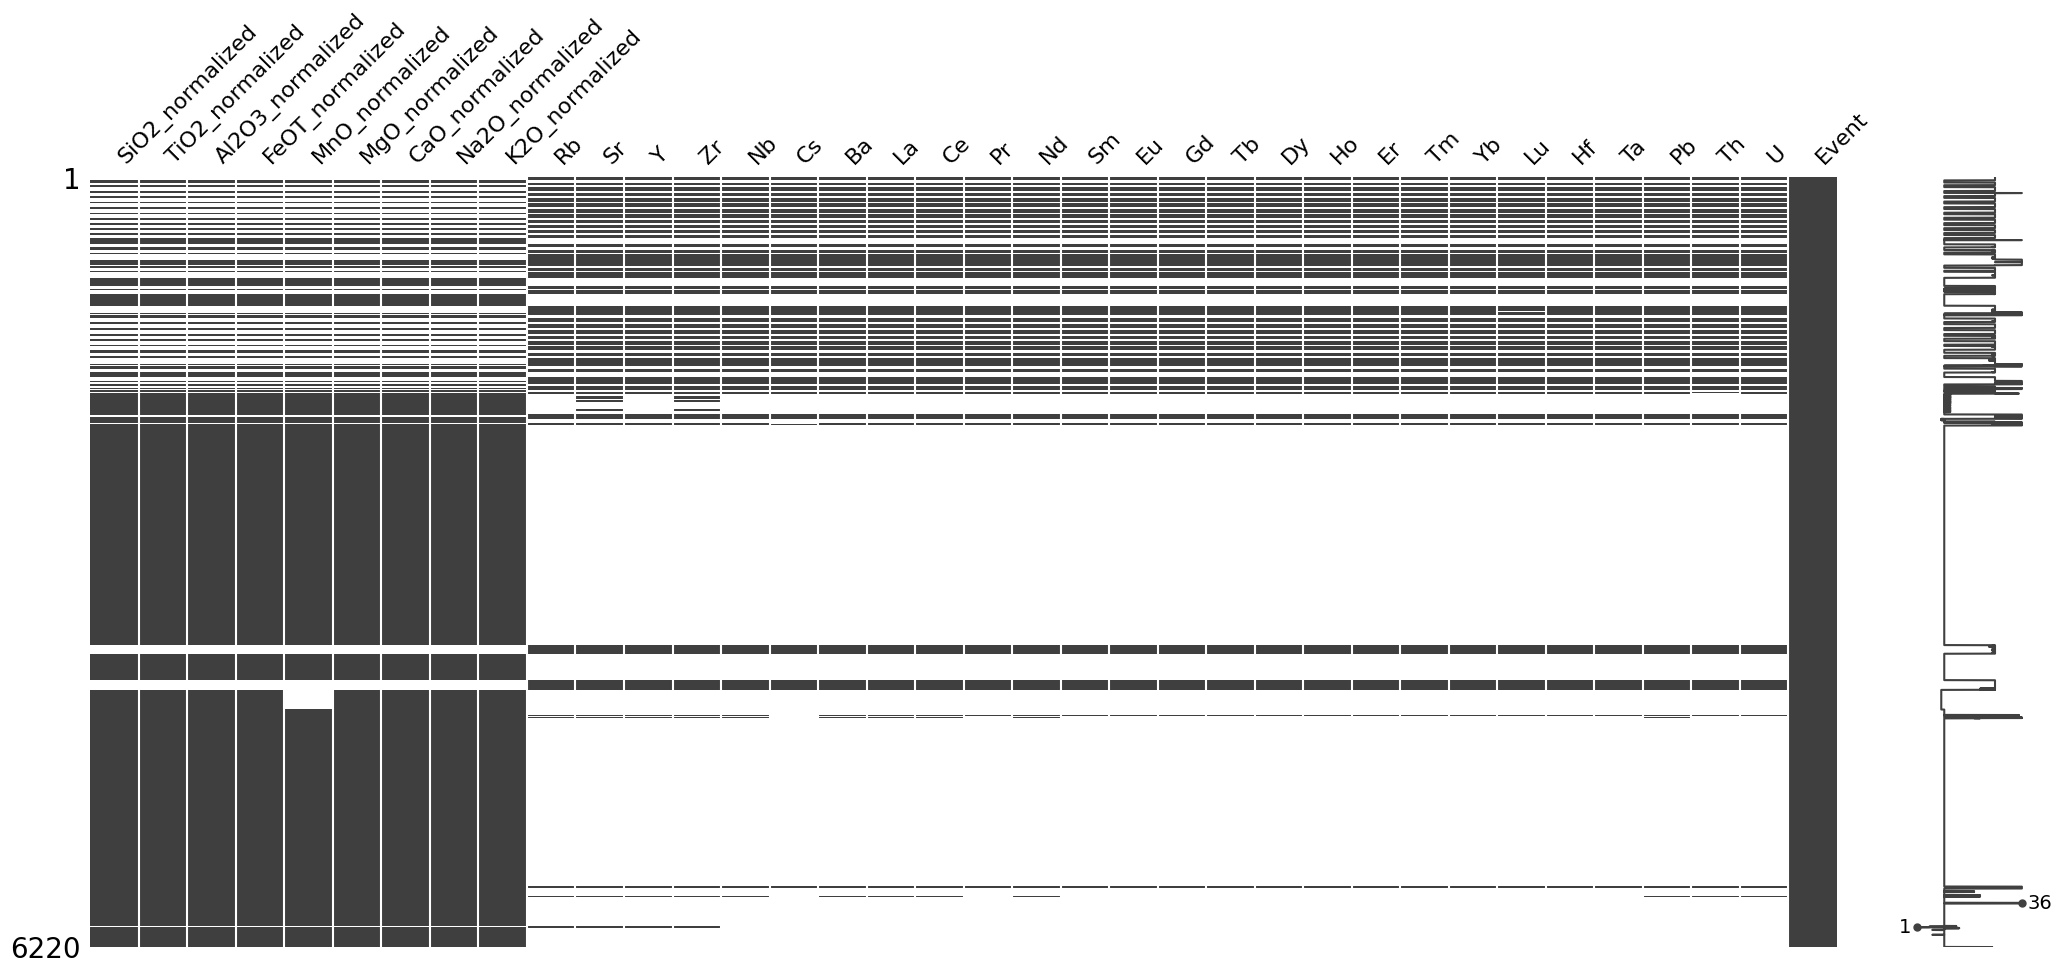

In [40]:
msno.matrix(train)

In [41]:
# impute major elements with regression imputation
imp = IterativeImputer(BayesianRidge(max_iter=1000))
train[majors] = imp.fit_transform(train[majors])
test[majors] = imp.transform(test[majors])

# impute trace elements with mean imputation
imp = IterativeImputer(SVR())
train[traces] = imp.fit_transform(train[traces])
test[traces] = imp.transform(test[traces])

KeyboardInterrupt: 

<Axes: >

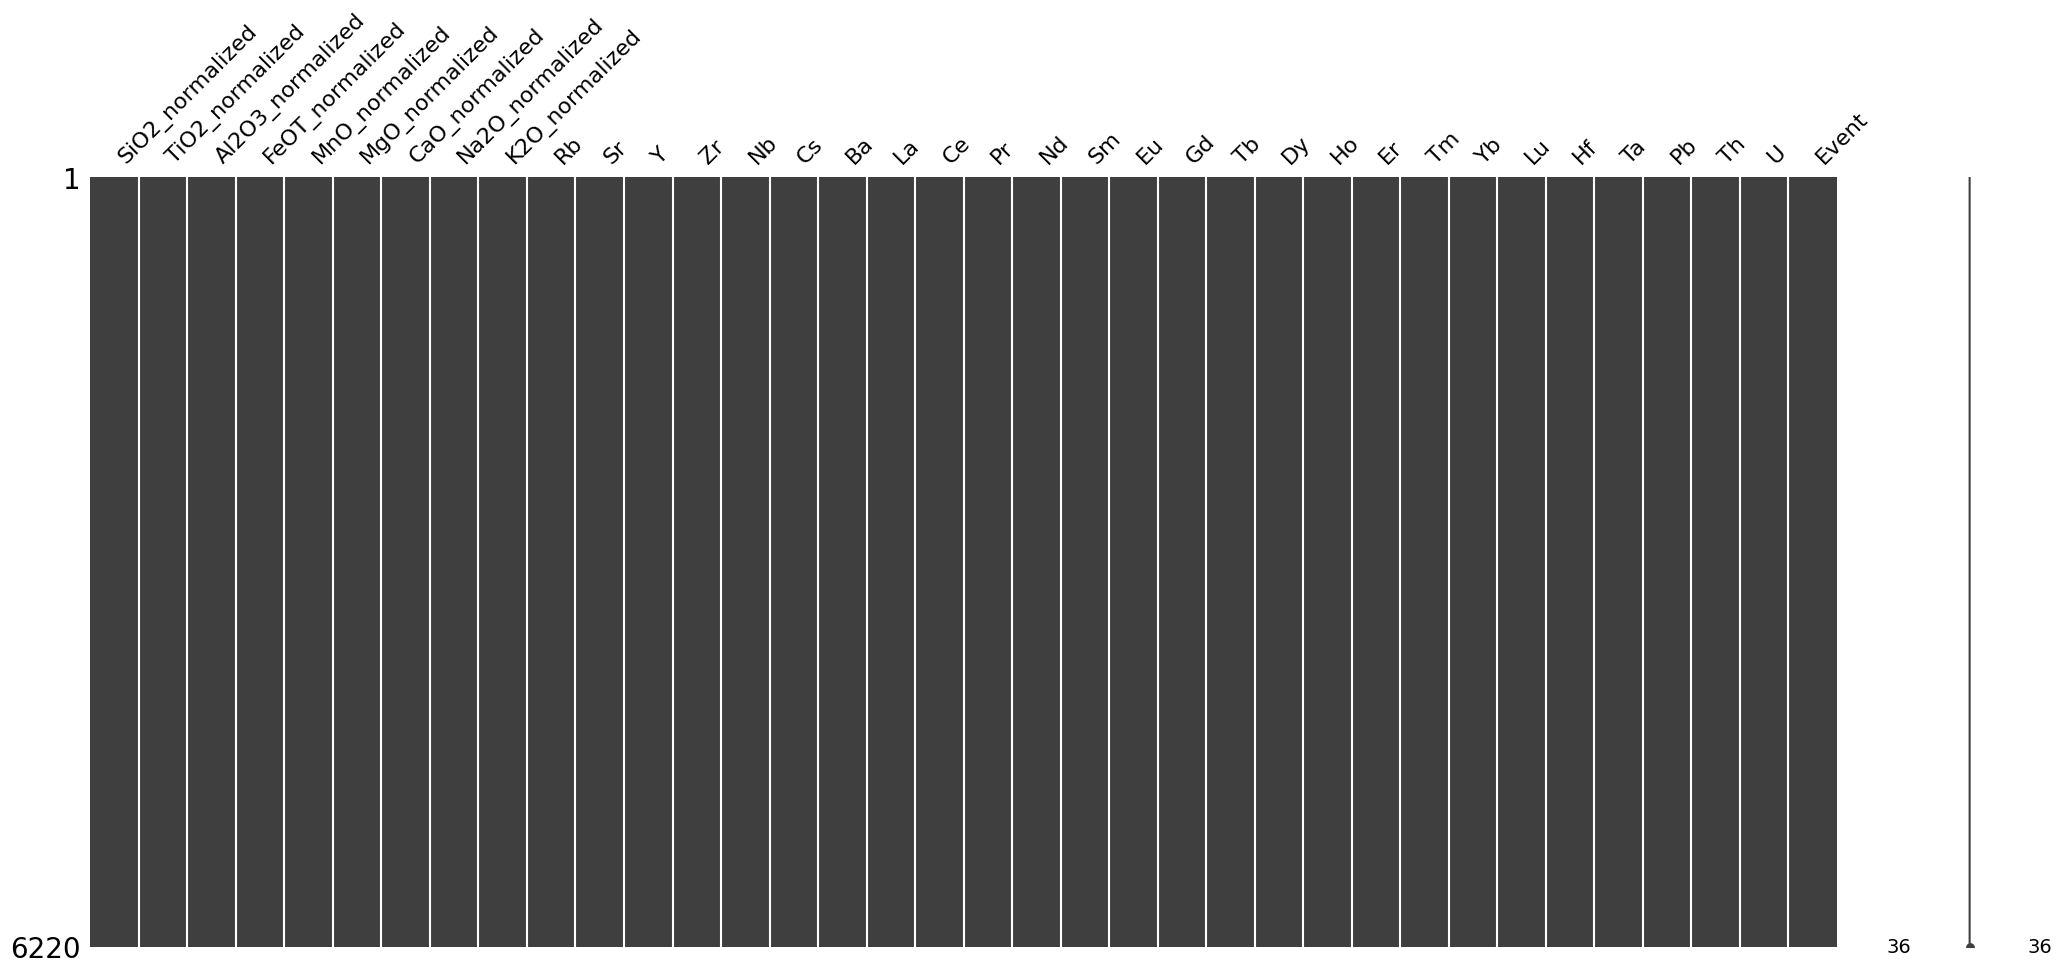

In [ ]:
msno.matrix(train)

<Axes: >

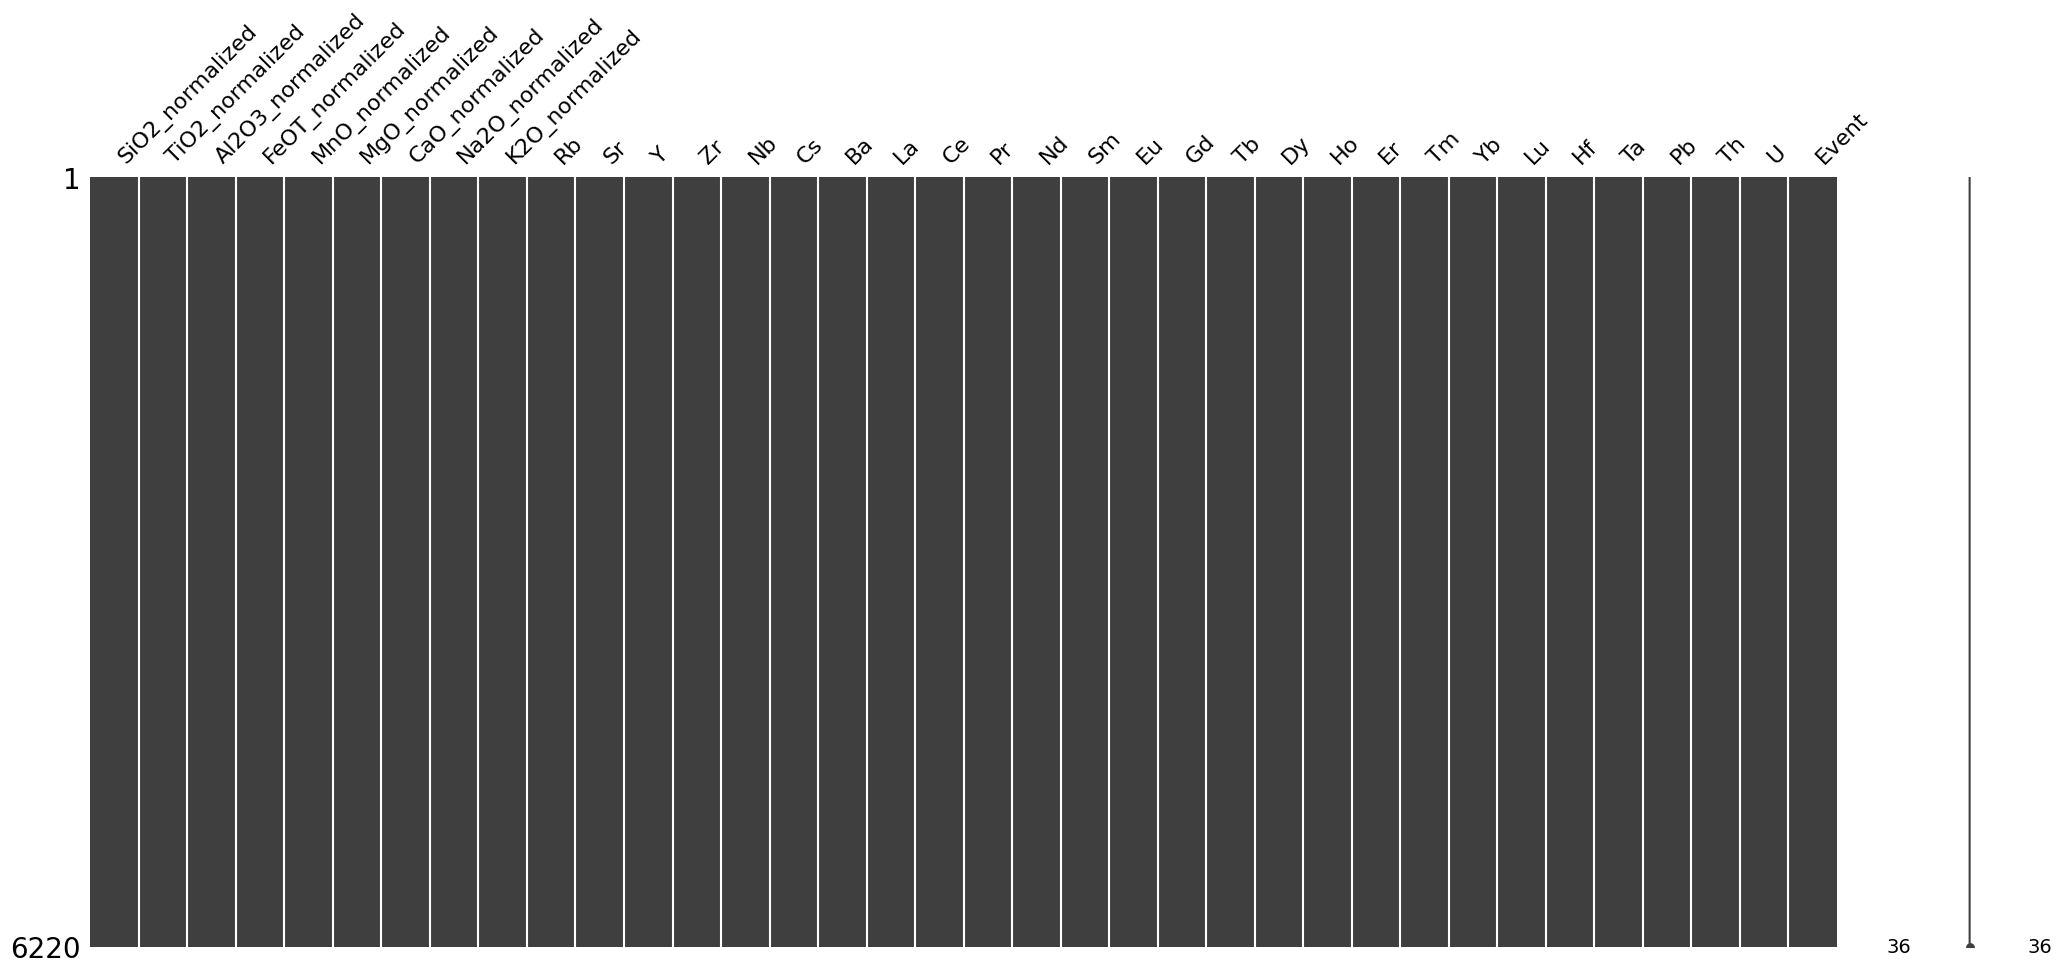

In [ ]:
msno.matrix(test)

In [ ]:
train.to_csv(basedir + "train_imputed.csv", index=False)
test.to_csv(basedir + "test_imputed.csv", index=False)

#### 3.3-Unbalanced data

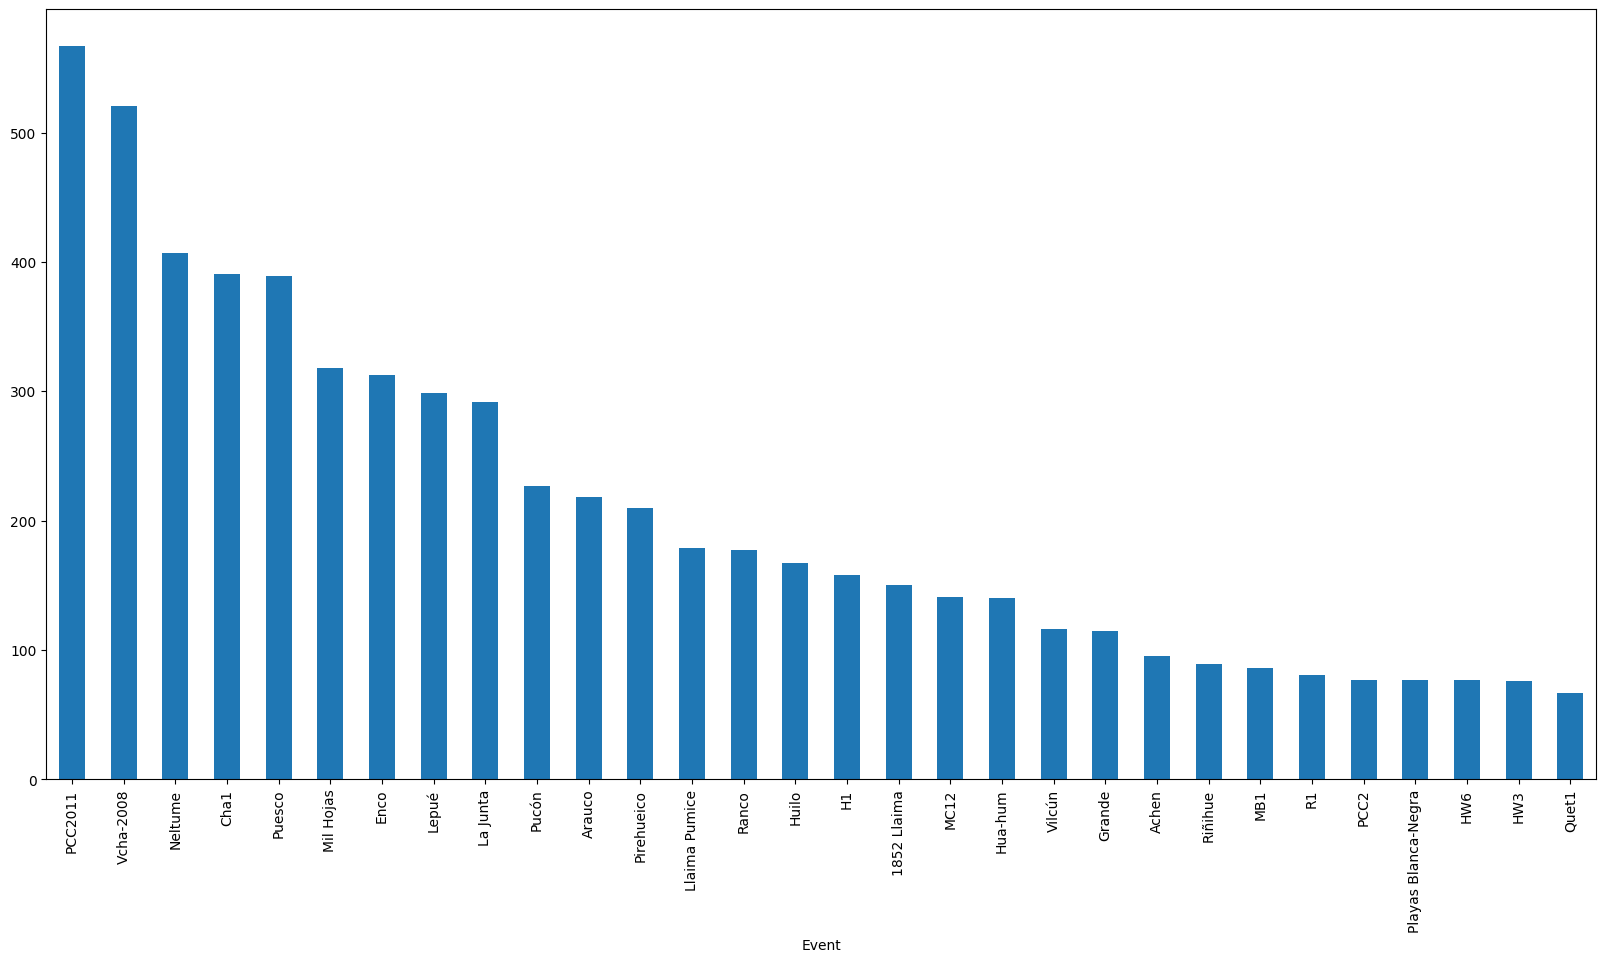

In [ ]:
ax_pub = train.Event.value_counts(normalize=False).plot(kind='bar', figsize=(20, 10))

In [ ]:
class_w = 1/train.Event.value_counts(normalize=True)

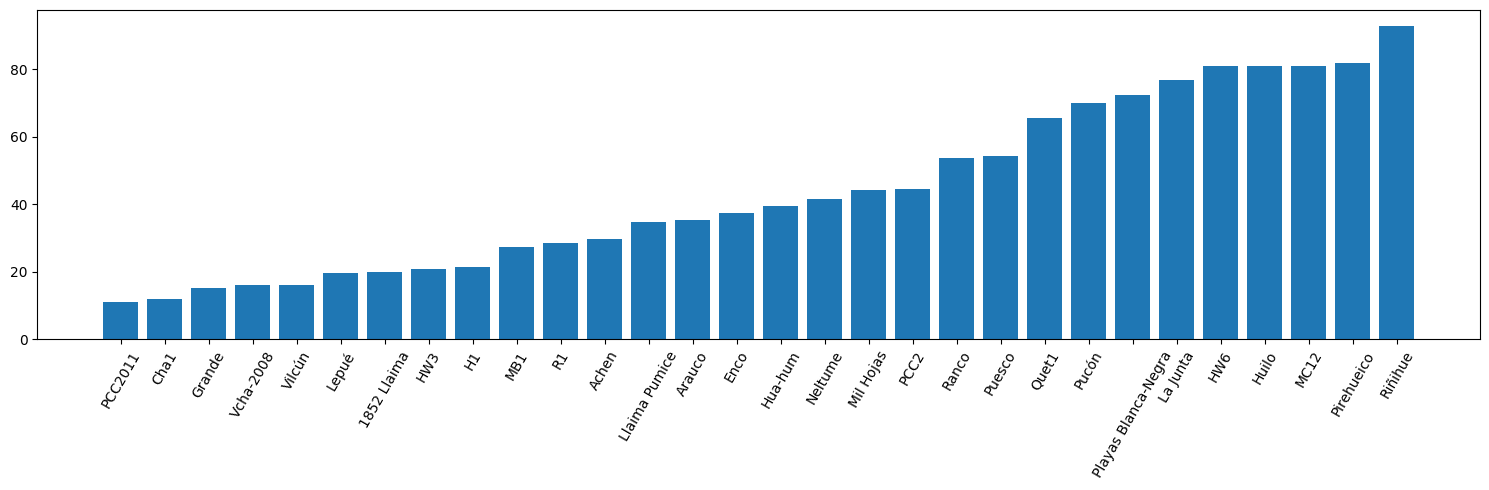

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(train.Event.unique(), class_w)
plt.xticks(rotation=60)

plt.tight_layout()

In [59]:
train = pd.read_csv(basedir + "train_imputed.csv")
test = pd.read_csv(basedir + "test_imputed.csv")

#### 3.4-Scaling

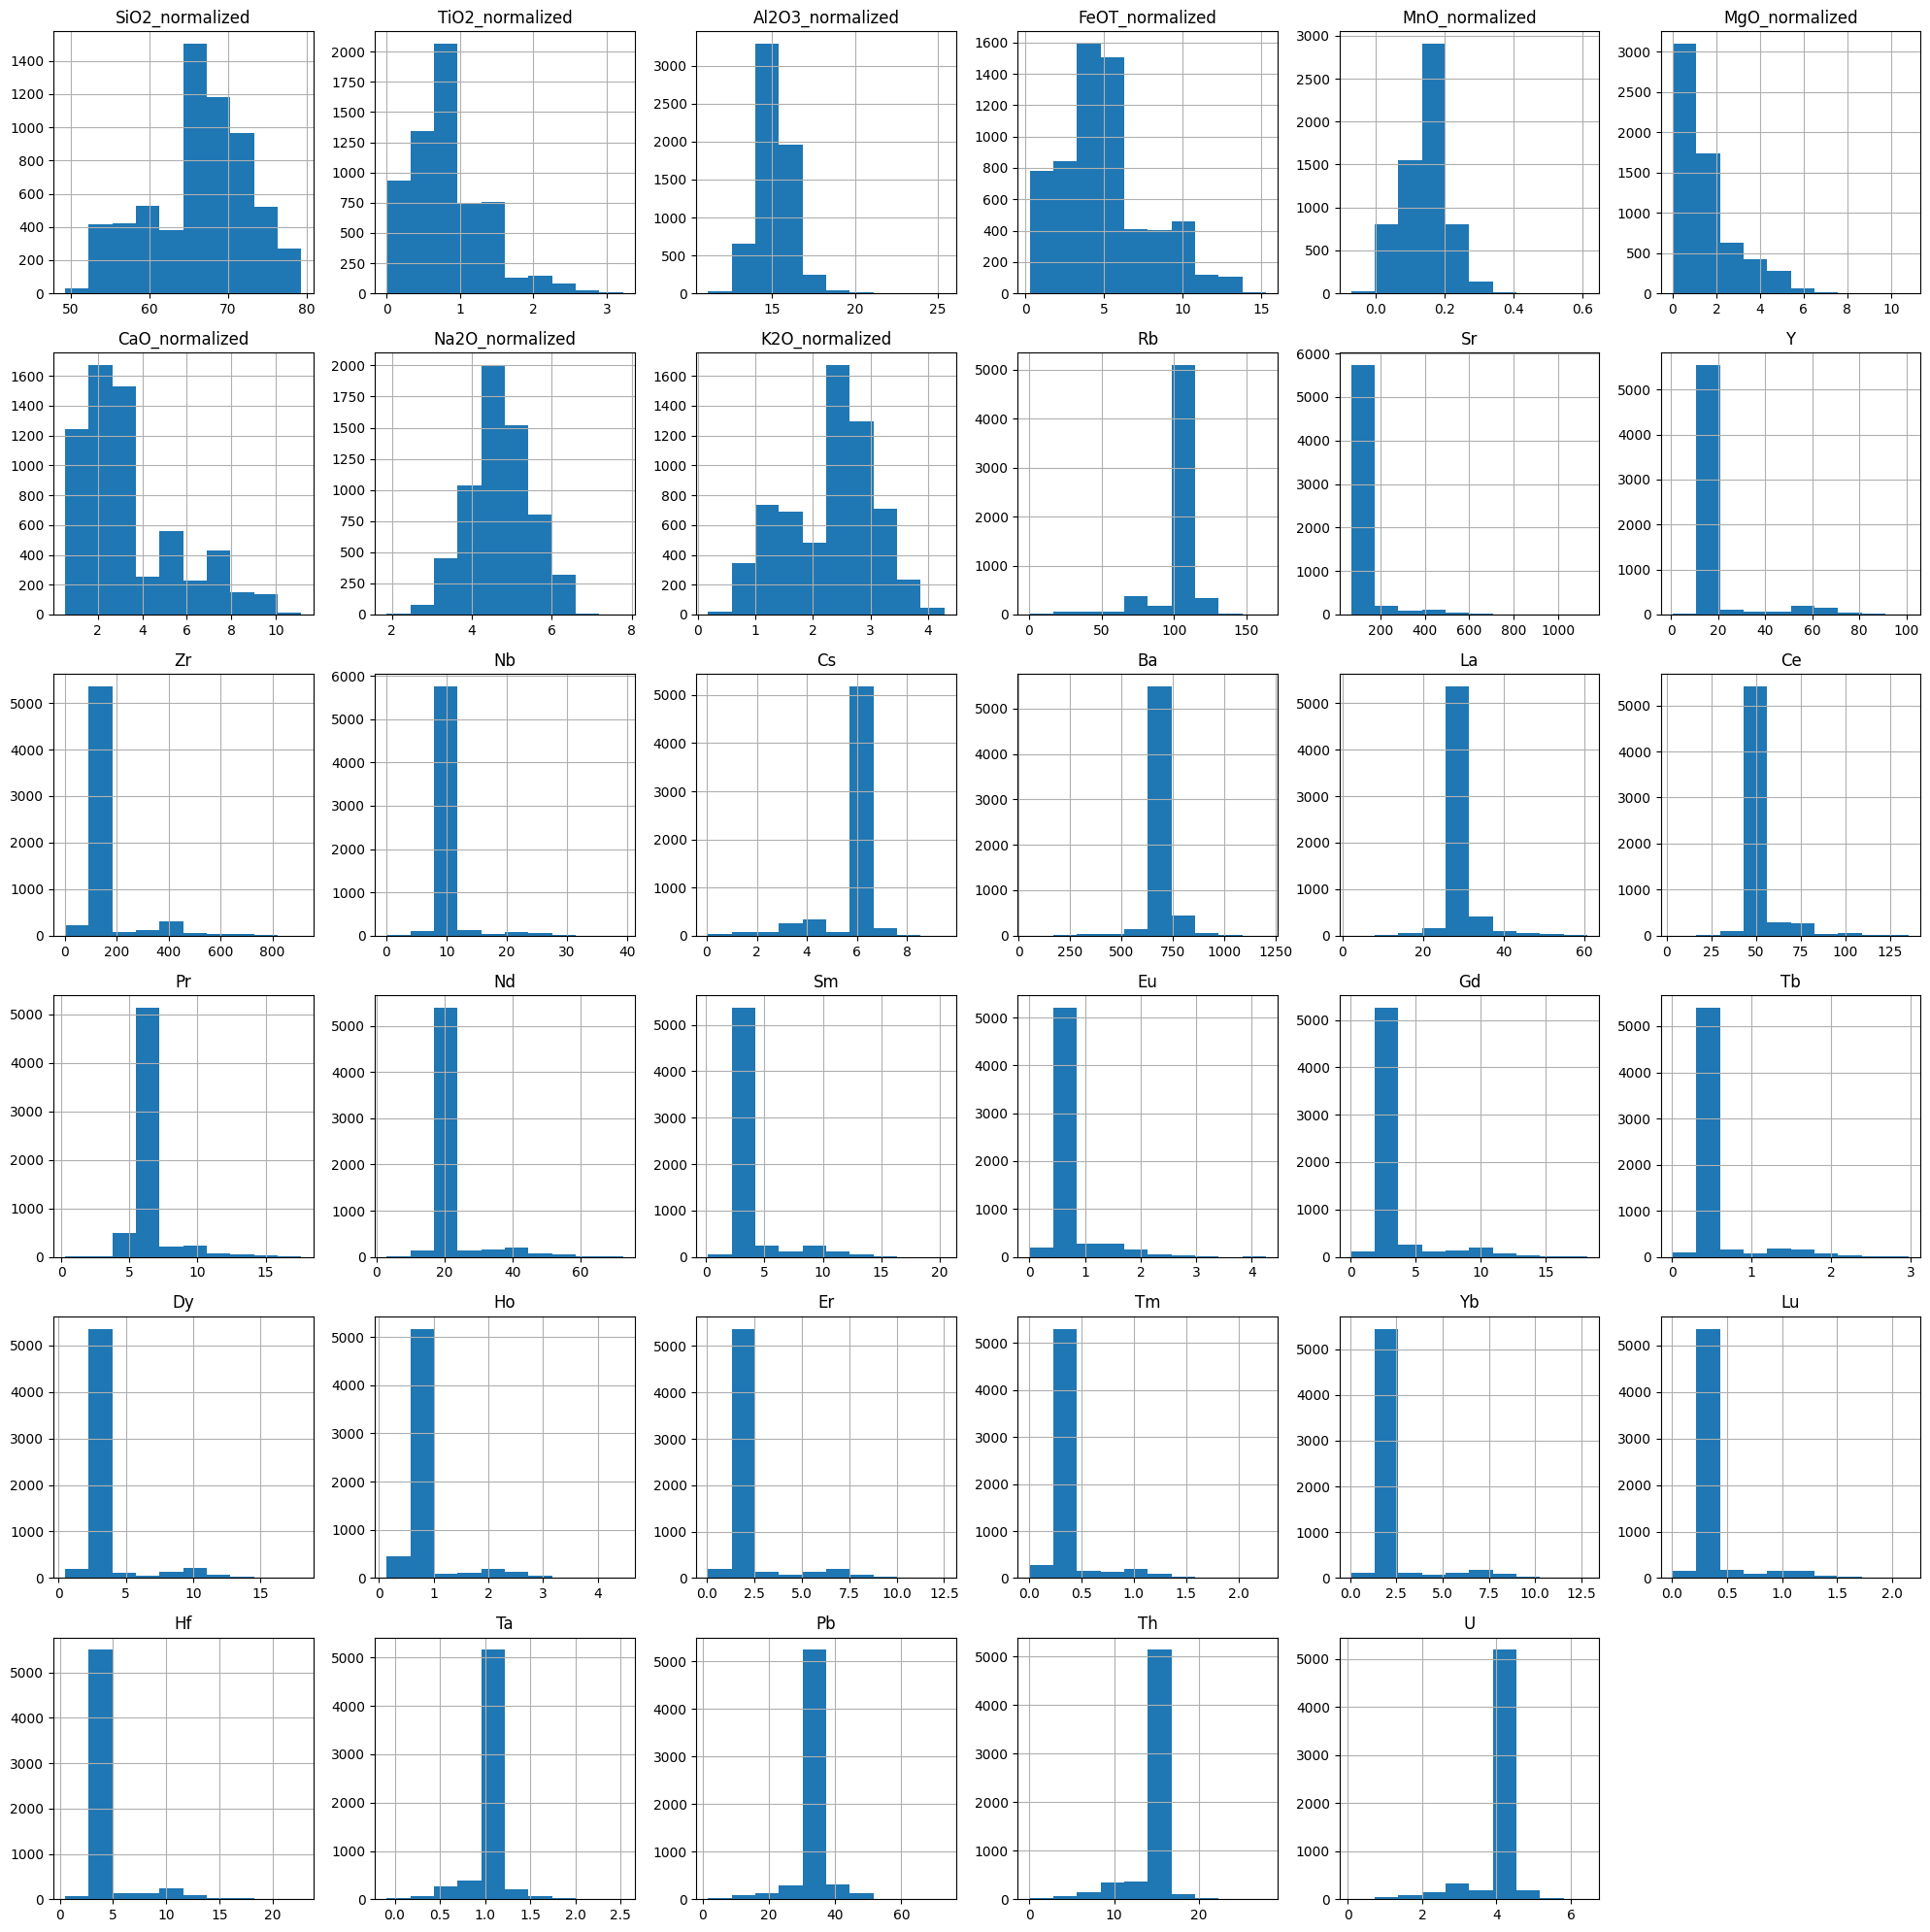

In [60]:
#histogram of the features
train.hist(figsize=(20, 20))
plt.tight_layout()

In [61]:
X_train = train.drop('Event', axis=1)
y_train = train.Event
X_test = test.drop('Event', axis=1)
y_test = test.Event

In [62]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4-Model

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9162379421221865